In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sys import platform

%matplotlib inline

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
    out_dir = '/Users/rmueller/Documents/Presentations/2020/OceanSciences2020/'
else:
    bathy_dir = '/data/vdo/MEOPAR/NEMO-forcing/grid/'
    results_dir = '/ocean/vdo/'
    out_dir = '/home/vdo/'
    
# Set to [1] if you want to print to file and [0] if not
print_to_file = 1  

In [4]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
else:
    bathy_dir = '/data/vdo/MEOPAR/NEMO-forcing/grid/'
    results_dir = '/ocean/vdo/'

In [5]:
## colourmap for the land/water. 
vmax = 1
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.85 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.850001 / vmax, 'papayawhip'), #change this if you want a different colour for land
                                                    (1 / vmax, 'papayawhip')] #change this if you want a different colour for land
                                        )

In [6]:
# colourmap for the prob maps. if changing he colours, change the colours of the patches (below) also
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightpink'), #colour for 1/6
                                                    (0.2 / vmax, 'lightpink'),
                                                    (0.20000001 / vmax, 'lightcoral'), #colour for 2/6
                                                    (0.4 / vmax, 'lightcoral'),
                                                    (0.4000001 / vmax, 'indianred'), #colur for 3/6
                                                    (0.55 / vmax, 'indianred'),
                                                    (0.550001 / vmax, 'firebrick'), #colour for 4/6
                                                    (0.75 / vmax, 'firebrick'),
                                                    (0.750001 / vmax, 'maroon'), #colour for 5/6
                                                    (0.95 / vmax, 'maroon'),
                                                    (0.95000001 / vmax, 'darkred'), #colour for 6/6
                                                    (1 / vmax, 'darkred')]
                                        )

In [7]:
# change colours if changing colours of colourmap
onesix_patch = mpatches.Patch(color='lightpink', label='1/6 runs')
twosix_patch = mpatches.Patch(color='lightcoral', label='2/6 runs') 
threesix_patch = mpatches.Patch(color='indianred', label='3/6 runs') 
foursix_patch = mpatches.Patch(color='firebrick', label='4/6 runs') 
fivesix_patch = mpatches.Patch(color='maroon', label='5/6 runs') 
sixsix_patch = mpatches.Patch(color='darkred', label='6/6 runs') 

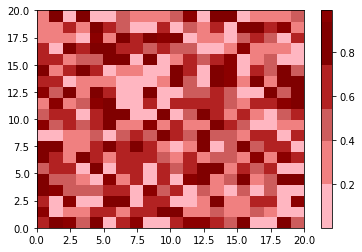

In [8]:
# if you want to see the colourbar
fig, ax = plt.subplots()
mesh = ax.pcolormesh(np.random.rand(20,20), cmap = cmap)
fig.colorbar(mesh, ax=ax)

In [9]:
grid = nc.Dataset(bathy_dir + 'bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

# SB with diesel

In [10]:
# the six date ranges files
f0 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_05jun15-12jun15_BunkerC.nc')
f1 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_01jan17-08jan17_BunkerC.nc')
f2 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_15jun17-22jun17_BunkerC.nc')
f3 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_01aug17-08aug17_BunkerC.nc')
f4 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_21nov17-28nov17_BunkerC.nc')
f5 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_15jan18-22jan18_BunkerC.nc')

In [11]:
xcoords0 = np.array([])
ycoords0 = np.array([])
values0 = np.array([])

In [12]:
xcoords1 = np.array([])
ycoords1 = np.array([])
values1 = np.array([])

xcoords2 = np.array([])
ycoords2 = np.array([])
values2 = np.array([])

xcoords3 = np.array([])
ycoords3 = np.array([])
values3 = np.array([])

xcoords4 = np.array([])
ycoords4 = np.array([])
values4 = np.array([])

xcoords5 = np.array([])
ycoords5 = np.array([])
values5 = np.array([])

In [13]:
# takes a little bit of time to run
for x in range(396):
    for y in range(896):
        if f0['Beaching_Time'][y,x] != 0:
            xcoords0 = np.append(xcoords0, x)
            ycoords0 = np.append(ycoords0, y)
            values0 = np.append(values0, f0['Beaching_Time'][y,x])
        if f1['Beaching_Time'][y,x] != 0:
            xcoords1 = np.append(xcoords1, x)
            ycoords1 = np.append(ycoords1, y)
            values1 = np.append(values1, f1['Beaching_Time'][y,x])
        if f2['Beaching_Time'][y,x] != 0:
            xcoords2 = np.append(xcoords2, x)
            ycoords2 = np.append(ycoords2, y)
            values2 = np.append(values2, f2['Beaching_Time'][y,x])
        if f3['Beaching_Time'][y,x] != 0:
            xcoords3 = np.append(xcoords3, x)
            ycoords3 = np.append(ycoords3, y)
            values3 = np.append(values3, f3['Beaching_Time'][y,x])
        if f4['Beaching_Time'][y,x] != 0:
            xcoords4 = np.append(xcoords4, x)
            ycoords4 = np.append(ycoords4, y)
            values4 = np.append(values4, f4['Beaching_Time'][y,x])
        if f5['Beaching_Time'][y,x] != 0:
            xcoords5 = np.append(xcoords5, x)
            ycoords5 = np.append(ycoords5, y)
            values5 = np.append(values5, f5['Beaching_Time'][y,x])

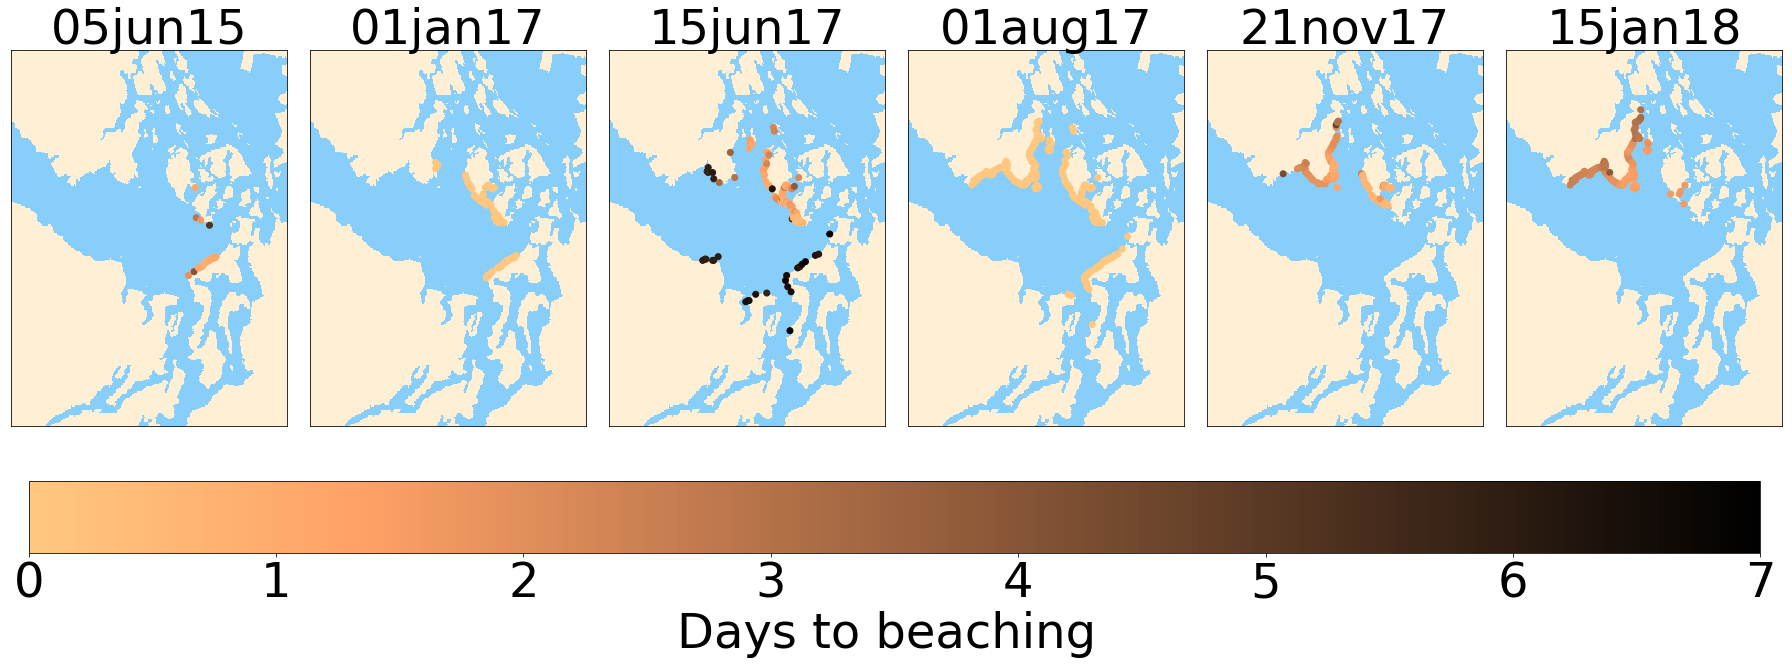

In [22]:
fig, ax = plt.subplots(1,6, figsize = (25,25))

# set fontsize
fs = 48

# plotting the land mask
for a in ax.flatten():
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

# setting titles
ax[0].set_title("05jun15", fontsize = fs) 
ax[1].set_title("01jan17", fontsize = fs) 
ax[2].set_title("15jun17", fontsize = fs) 
ax[3].set_title("01aug17", fontsize = fs) 
ax[4].set_title("21nov17", fontsize = fs)
ax[5].set_title("15jan18", fontsize = fs)

#plotting beaching scales
ax[0].scatter(xcoords0, ycoords0, c = values0/24, vmin = 0, vmax = 7, cmap = 'copper_r')
ax[1].scatter(xcoords1, ycoords1, c = values1/24, vmin = 0, vmax = 7, cmap = 'copper_r')
ax[2].scatter(xcoords2, ycoords2, c = values2/24, vmin = 0, vmax = 7, cmap = 'copper_r')
ax[3].scatter(xcoords3, ycoords3, c = values3/24, vmin = 0, vmax = 7, cmap = 'copper_r')
ax[4].scatter(xcoords4, ycoords4, c = values4/24, vmin = 0, vmax = 7, cmap = 'copper_r')
mesh = ax[5].pcolormesh(np.ma.masked_equal(f5['Beaching_Time'][:,:], 0), vmin = 0, vmax = 7, cmap = 'copper_r')
ax[5].scatter(xcoords5, ycoords5, c = values5/24, vmin = 0, vmax = 7, cmap = 'copper_r')
for a in ax:
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
    viz_tools.set_aspect(a)
    a.set_xlim(100,350) #change this to set x axis limits
    a.set_ylim(100,400) #change this to set y axis limits
    
plt.tight_layout();
    
p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()
p2 = ax[2].get_position().get_points().flatten()
p3 = ax[3].get_position().get_points().flatten()
p4 = ax[4].get_position().get_points().flatten()
p5 = ax[5].get_position().get_points().flatten()
#change second argument (currently 0.3) to adjust vertical position of colorbar
# change 4th argument (currently 0.05) to change thickness of colorbar
ax_cbar = fig.add_axes([p0[0]+.01, 0.325, p5[2]-.03, 0.04]) 
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('Days to beaching ', fontsize = fs);

if print_to_file:
    fig.savefig(out_dir + 'Pictures/SB_bunkerc_6panel.jpeg', dpi = 700);


In [15]:
f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0

f2lessthanone = f2['Beaching_Time'][:,:]
f2lessthanone[(f2lessthanone <= 24) & (f2lessthanone > 0)] = 1
f2lessthanone[(f2lessthanone > 24) | (f2lessthanone == 0)] = 0

f3lessthanone = f3['Beaching_Time'][:,:]
f3lessthanone[(f3lessthanone <= 24) & (f3lessthanone > 0)] = 1
f3lessthanone[(f3lessthanone > 24) | (f3lessthanone == 0)] = 0

f4lessthanone = f4['Beaching_Time'][:,:]
f4lessthanone[(f4lessthanone <= 24) & (f4lessthanone > 0)] = 1
f4lessthanone[(f4lessthanone > 24) | (f4lessthanone == 0)] = 0

f5lessthanone = f5['Beaching_Time'][:,:]
f5lessthanone[(f5lessthanone <= 24) & (f5lessthanone > 0)] = 1
f5lessthanone[(f5lessthanone > 24) | (f5lessthanone == 0)] = 0

problessthanone = (f0lessthanone+f1lessthanone+f2lessthanone+f3lessthanone+f4lessthanone+f5lessthanone)/6

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0

f2lessthanthree = f2['Beaching_Time'][:,:]
f2lessthanthree[(f2lessthanthree <= 72) & (f2lessthanthree > 0)] = 1
f2lessthanthree[(f2lessthanthree > 72) | (f2lessthanthree == 0)] = 0

f3lessthanthree = f3['Beaching_Time'][:,:]
f3lessthanthree[(f3lessthanthree <= 72) & (f3lessthanthree > 0)] = 1
f3lessthanthree[(f3lessthanthree > 72) | (f3lessthanthree == 0)] = 0

f4lessthanthree = f4['Beaching_Time'][:,:]
f4lessthanthree[(f4lessthanthree <= 72) & (f4lessthanthree > 0)] = 1
f4lessthanthree[(f4lessthanthree > 72) | (f4lessthanthree == 0)] = 0

f5lessthanthree = f5['Beaching_Time'][:,:]
f5lessthanthree[(f5lessthanthree <= 72) & (f5lessthanthree > 0)] = 1
f5lessthanthree[(f5lessthanthree > 72) | (f5lessthanthree == 0)] = 0

problessthanthree = (f0lessthanthree+f1lessthanthree+f2lessthanthree+f3lessthanthree+f4lessthanthree+f5lessthanthree)/6

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

f2lessthanseven = f2['Beaching_Time'][:,:]
f2lessthanseven[(f2lessthanseven <= 168) & (f2lessthanseven > 0)] = 1
f2lessthanseven[(f2lessthanseven > 168) | (f2lessthanseven == 0)] = 0

f3lessthanseven = f3['Beaching_Time'][:,:]
f3lessthanseven[(f3lessthanseven <= 168) & (f3lessthanseven > 0)] = 1
f3lessthanseven[(f3lessthanseven > 168) | (f3lessthanseven == 0)] = 0

f4lessthanseven = f4['Beaching_Time'][:,:]
f4lessthanseven[(f4lessthanseven <= 168) & (f4lessthanseven > 0)] = 1
f4lessthanseven[(f4lessthanseven > 168) | (f4lessthanseven == 0)] = 0

f5lessthanseven = f5['Beaching_Time'][:,:]
f5lessthanseven[(f5lessthanseven <= 168) & (f5lessthanseven > 0)] = 1
f5lessthanseven[(f5lessthanseven > 168) | (f5lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven+f2lessthanseven+f3lessthanseven+f4lessthanseven+f5lessthanseven)/6

In [16]:
problessthanone.shape

(896, 396)

In [17]:
xcoords1 = np.array([])
ycoords1 = np.array([])
values1 = np.array([])

xcoords3 = np.array([])
ycoords3 = np.array([])
values3 = np.array([])

xcoords7 = np.array([])
ycoords7 = np.array([])
values7 = np.array([])

for x in range(396):
    for y in range(896):
        if problessthanone[y,x] != 0:
            xcoords1 = np.append(xcoords1, x)
            ycoords1 = np.append(ycoords1, y)
            values1 = np.append(values1, problessthanone[y,x])
        if problessthanthree[y,x] != 0:
            xcoords3 = np.append(xcoords3, x)
            ycoords3 = np.append(ycoords3, y)
            values3 = np.append(values3, problessthanthree[y,x])
        if problessthanseven[y,x] != 0:
            xcoords7 = np.append(xcoords7, x)
            ycoords7 = np.append(ycoords7, y)
            values7 = np.append(values7, problessthanseven[y,x])

In [18]:
# sort arrays so largest values are on top
values1_s = np.sort(values1)
values3_s = np.sort(values3)
values7_s = np.sort(values7)

# get sorting indices
sort1_ind = np.argsort(values1)
sort3_ind = np.argsort(values3)
sort7_ind = np.argsort(values7)

# sort the coordinates
xcoords1_s = np.take(xcoords1, sort1_ind)
xcoords3_s = np.take(xcoords3, sort3_ind)
xcoords7_s = np.take(xcoords7, sort7_ind)

ycoords1_s = np.take(ycoords1, sort1_ind)
ycoords3_s = np.take(ycoords3, sort3_ind)
ycoords7_s = np.take(ycoords7, sort7_ind)

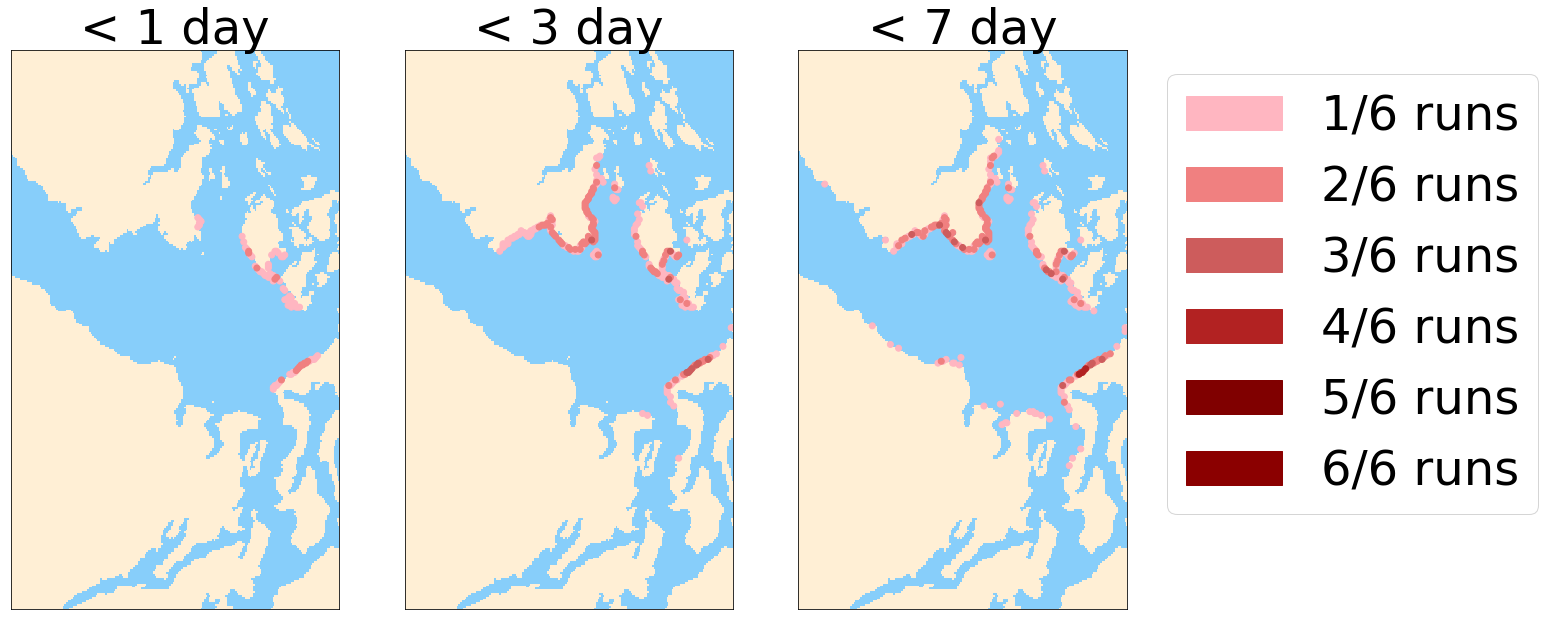

In [19]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].scatter(xcoords1_s, ycoords1_s, c = values1_s, cmap = cmap, vmin = 0, vmax = 1)
ax[1].scatter(xcoords3_s, ycoords3_s, c = values3_s, cmap = cmap, vmin = 0, vmax = 1)
ax[2].scatter(xcoords7_s, ycoords7_s, c = values7_s, cmap = cmap, vmin = 0, vmax = 1)

ax[0].set_title('< 1 day', fontsize = fs)
ax[1].set_title('< 3 day', fontsize = fs)
ax[2].set_title('< 7 day', fontsize = fs)

plt.legend(handles=[onesix_patch, twosix_patch, threesix_patch, foursix_patch, fivesix_patch, sixsix_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = fs)

for a in ax:
    viz_tools.set_aspect(a)
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
    a.set_ylim(100, 400);
    a.set_xlim(100, 300);

In [20]:

fig.savefig(out_dir + 'Pictures/SB_diesel_scatter.png', dpi = 600, bbox_inches='tight' );

geo_tools.find_closest_model_point(-122.97, 48.77, 
                                   (np.reshape(f['longitude'][:], (1,572)) * np.ones((661,572)))-360,
                                  np.reshape(f['latitude'][:], (661,1)) * np.ones((661,572)))

# old plots left as reference

# TP with AKNS

In [21]:
f0 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/akns/TP/Lagrangian_AKNS_crude_01aug17-08aug17_Diesel.nc')
f1 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/akns/TP/Lagrangian_AKNS_crude_01jan17-08jan17_Diesel.nc')
f2 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/akns/TP/Lagrangian_AKNS_crude_05jun15-12jun15_Diesel.nc')
f3 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/akns/TP/Lagrangian_AKNS_crude_15jan18-22jan18_Diesel.nc')
f4 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/akns/TP/Lagrangian_AKNS_crude_15jun17-22jun17_Diesel.nc')
f5 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/akns/TP/Lagrangian_AKNS_crude_21nov17-28nov17_Diesel.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/ocean/vdo/MIDOSS/results/OS2020/akns/TP/Lagrangian_AKNS_crude_01aug17-08aug17_Diesel.nc'

In [ ]:
fig, ax = plt.subplots(1,6, figsize = (25,25))
for a in ax.flatten():
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
ax[0].set_title("01aug17")
ax[1].set_title("01jan17")
ax[2].set_title("05jun15")
ax[3].set_title("15jan18")
ax[4].set_title("15jun17")
ax[5].set_title("21nov17")
ax[0].pcolormesh(np.ma.masked_equal(f0['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[1].pcolormesh(np.ma.masked_equal(f1['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[2].pcolormesh(np.ma.masked_equal(f2['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[3].pcolormesh(np.ma.masked_equal(f3['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[4].pcolormesh(np.ma.masked_equal(f4['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
mesh = ax[5].pcolormesh(np.ma.masked_equal(f5['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')

for a in ax:
    viz_tools.set_aspect(a)
    a.set_xlim(50,350)
    a.set_ylim(100,450)
    
plt.tight_layout();
    
#fig.colorbar(mesh, orientation="horizontal", pad=0.2)
p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()
p2 = ax[2].get_position().get_points().flatten()
p3 = ax[3].get_position().get_points().flatten()
p4 = ax[4].get_position().get_points().flatten()
p5 = ax[5].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.25, p5[2], 0.05])
plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal');

In [ ]:
f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0

f2lessthanone = f2['Beaching_Time'][:,:]
f2lessthanone[(f2lessthanone <= 24) & (f2lessthanone > 0)] = 1
f2lessthanone[(f2lessthanone > 24) | (f2lessthanone == 0)] = 0

f3lessthanone = f3['Beaching_Time'][:,:]
f3lessthanone[(f3lessthanone <= 24) & (f3lessthanone > 0)] = 1
f3lessthanone[(f3lessthanone > 24) | (f3lessthanone == 0)] = 0

f4lessthanone = f4['Beaching_Time'][:,:]
f4lessthanone[(f4lessthanone <= 24) & (f4lessthanone > 0)] = 1
f4lessthanone[(f4lessthanone > 24) | (f4lessthanone == 0)] = 0

f5lessthanone = f5['Beaching_Time'][:,:]
f5lessthanone[(f5lessthanone <= 24) & (f5lessthanone > 0)] = 1
f5lessthanone[(f5lessthanone > 24) | (f5lessthanone == 0)] = 0

problessthanone = (f0lessthanone+f1lessthanone+f2lessthanone+f3lessthanone+f4lessthanone+f5lessthanone)/6

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0

f2lessthanthree = f2['Beaching_Time'][:,:]
f2lessthanthree[(f2lessthanthree <= 72) & (f2lessthanthree > 0)] = 1
f2lessthanthree[(f2lessthanthree > 72) | (f2lessthanthree == 0)] = 0

f3lessthanthree = f3['Beaching_Time'][:,:]
f3lessthanthree[(f3lessthanthree <= 72) & (f3lessthanthree > 0)] = 1
f3lessthanthree[(f3lessthanthree > 72) | (f3lessthanthree == 0)] = 0

f4lessthanthree = f4['Beaching_Time'][:,:]
f4lessthanthree[(f4lessthanthree <= 72) & (f4lessthanthree > 0)] = 1
f4lessthanthree[(f4lessthanthree > 72) | (f4lessthanthree == 0)] = 0

f5lessthanthree = f5['Beaching_Time'][:,:]
f5lessthanthree[(f5lessthanthree <= 72) & (f5lessthanthree > 0)] = 1
f5lessthanthree[(f5lessthanthree > 72) | (f5lessthanthree == 0)] = 0

problessthanthree = (f0lessthanthree+f1lessthanthree+f2lessthanthree+f3lessthanthree+f4lessthanthree+f5lessthanthree)/6

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

f2lessthanseven = f2['Beaching_Time'][:,:]
f2lessthanseven[(f2lessthanseven <= 168) & (f2lessthanseven > 0)] = 1
f2lessthanseven[(f2lessthanseven > 168) | (f2lessthanseven == 0)] = 0

f3lessthanseven = f3['Beaching_Time'][:,:]
f3lessthanseven[(f3lessthanseven <= 168) & (f3lessthanseven > 0)] = 1
f3lessthanseven[(f3lessthanseven > 168) | (f3lessthanseven == 0)] = 0

f4lessthanseven = f4['Beaching_Time'][:,:]
f4lessthanseven[(f4lessthanseven <= 168) & (f4lessthanseven > 0)] = 1
f4lessthanseven[(f4lessthanseven > 168) | (f4lessthanseven == 0)] = 0

f5lessthanseven = f5['Beaching_Time'][:,:]
f5lessthanseven[(f5lessthanseven <= 168) & (f5lessthanseven > 0)] = 1
f5lessthanseven[(f5lessthanseven > 168) | (f5lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven+f2lessthanseven+f3lessthanseven+f4lessthanseven+f5lessthanseven)/6

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

ax[0].set_title('< 1 day')
ax[1].set_title('< 3 day')
ax[2].set_title('< 7 day')

plt.legend(handles=[pink_patch, red_patch, green_patch, blue_patch, olive_patch, purple_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left')

for a in ax:
    viz_tools.set_aspect(a)
    a.set_ylim(100, 400);
    a.set_xlim(100, 300);

# TP with diesel

In [ ]:
f0 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/diesel/TP/Lagrangian_DieselFuel_refined_01aug17-08aug17_Diesel.nc')
f1 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/diesel/TP/Lagrangian_DieselFuel_refined_01jan17-08jan17_Diesel.nc')
f2 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/diesel/TP/Lagrangian_DieselFuel_refined_05jun15-12jun15_Diesel.nc')
f3 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/diesel/TP/Lagrangian_DieselFuel_refined_15jan18-22jan18_Diesel.nc')
f4 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/diesel/TP/Lagrangian_DieselFuel_refined_15jun17-22jun17_Diesel.nc')
f5 = nc.Dataset('/ocean/vdo/MIDOSS/results/OS2020/diesel/TP/Lagrangian_DieselFuel_refined_21nov17-28nov17_Diesel.nc')

In [ ]:
fig, ax = plt.subplots(1,6, figsize = (25,25))
for a in ax.flatten():
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
ax[0].set_title("01aug17")
ax[1].set_title("01jan17")
ax[2].set_title("05jun15")
ax[3].set_title("15jan18")
ax[4].set_title("15jun17")
ax[5].set_title("21nov17")
ax[0].pcolormesh(np.ma.masked_equal(f0['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[1].pcolormesh(np.ma.masked_equal(f1['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[2].pcolormesh(np.ma.masked_equal(f2['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[3].pcolormesh(np.ma.masked_equal(f3['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[4].pcolormesh(np.ma.masked_equal(f4['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
mesh = ax[5].pcolormesh(np.ma.masked_equal(f5['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')

for a in ax:
    viz_tools.set_aspect(a)
    a.set_xlim(50,350)
    a.set_ylim(100,450)
    
plt.tight_layout();
    
#fig.colorbar(mesh, orientation="horizontal", pad=0.2)
p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()
p2 = ax[2].get_position().get_points().flatten()
p3 = ax[3].get_position().get_points().flatten()
p4 = ax[4].get_position().get_points().flatten()
p5 = ax[5].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.25, p5[2], 0.05])
plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal');
#fig.savefig('/home/vdo/Pictures/TPwdiedel.png', dpi = 400)

In [ ]:
f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0

f2lessthanone = f2['Beaching_Time'][:,:]
f2lessthanone[(f2lessthanone <= 24) & (f2lessthanone > 0)] = 1
f2lessthanone[(f2lessthanone > 24) | (f2lessthanone == 0)] = 0

f3lessthanone = f3['Beaching_Time'][:,:]
f3lessthanone[(f3lessthanone <= 24) & (f3lessthanone > 0)] = 1
f3lessthanone[(f3lessthanone > 24) | (f3lessthanone == 0)] = 0

f4lessthanone = f4['Beaching_Time'][:,:]
f4lessthanone[(f4lessthanone <= 24) & (f4lessthanone > 0)] = 1
f4lessthanone[(f4lessthanone > 24) | (f4lessthanone == 0)] = 0

f5lessthanone = f5['Beaching_Time'][:,:]
f5lessthanone[(f5lessthanone <= 24) & (f5lessthanone > 0)] = 1
f5lessthanone[(f5lessthanone > 24) | (f5lessthanone == 0)] = 0

problessthanone = (f0lessthanone+f1lessthanone+f2lessthanone+f3lessthanone+f4lessthanone+f5lessthanone)/6

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0

f2lessthanthree = f2['Beaching_Time'][:,:]
f2lessthanthree[(f2lessthanthree <= 72) & (f2lessthanthree > 0)] = 1
f2lessthanthree[(f2lessthanthree > 72) | (f2lessthanthree == 0)] = 0

f3lessthanthree = f3['Beaching_Time'][:,:]
f3lessthanthree[(f3lessthanthree <= 72) & (f3lessthanthree > 0)] = 1
f3lessthanthree[(f3lessthanthree > 72) | (f3lessthanthree == 0)] = 0

f4lessthanthree = f4['Beaching_Time'][:,:]
f4lessthanthree[(f4lessthanthree <= 72) & (f4lessthanthree > 0)] = 1
f4lessthanthree[(f4lessthanthree > 72) | (f4lessthanthree == 0)] = 0

f5lessthanthree = f5['Beaching_Time'][:,:]
f5lessthanthree[(f5lessthanthree <= 72) & (f5lessthanthree > 0)] = 1
f5lessthanthree[(f5lessthanthree > 72) | (f5lessthanthree == 0)] = 0

problessthanthree = (f0lessthanthree+f1lessthanthree+f2lessthanthree+f3lessthanthree+f4lessthanthree+f5lessthanthree)/6

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

f2lessthanseven = f2['Beaching_Time'][:,:]
f2lessthanseven[(f2lessthanseven <= 168) & (f2lessthanseven > 0)] = 1
f2lessthanseven[(f2lessthanseven > 168) | (f2lessthanseven == 0)] = 0

f3lessthanseven = f3['Beaching_Time'][:,:]
f3lessthanseven[(f3lessthanseven <= 168) & (f3lessthanseven > 0)] = 1
f3lessthanseven[(f3lessthanseven > 168) | (f3lessthanseven == 0)] = 0

f4lessthanseven = f4['Beaching_Time'][:,:]
f4lessthanseven[(f4lessthanseven <= 168) & (f4lessthanseven > 0)] = 1
f4lessthanseven[(f4lessthanseven > 168) | (f4lessthanseven == 0)] = 0

f5lessthanseven = f5['Beaching_Time'][:,:]
f5lessthanseven[(f5lessthanseven <= 168) & (f5lessthanseven > 0)] = 1
f5lessthanseven[(f5lessthanseven > 168) | (f5lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven+f2lessthanseven+f3lessthanseven+f4lessthanseven+f5lessthanseven)/6

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

ax[0].set_title('< 1 day')
ax[1].set_title('< 3 day')
ax[2].set_title('< 7 day')

plt.legend(handles=[pink_patch, red_patch, green_patch, blue_patch, olive_patch, purple_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left')

for a in ax:
    viz_tools.set_aspect(a)
    a.set_ylim(100, 400);
    a.set_xlim(100, 300);